In [354]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [355]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [356]:
print(movies.info())
print(links.info())
print(ratings.info())
print(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

In [357]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [358]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [359]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [360]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [361]:
# shape of movies

movies.shape

(9742, 3)

In [362]:
# shape of ratings

ratings.shape

(100836, 4)

In [363]:
# unique ids in ratings

ratings.userId.nunique()

610

In [364]:
#Which movie has recieved maximum number of user ratings?

df = ratings.join(movies, on = 'movieId',lsuffix='_ratings',rsuffix='_movies',how = 'inner')

In [365]:
temp = df[(df['title'].str.contains('Matrix', na=False)) | (df['title'].str.contains('Pulp Fiction', na=False))
| (df['title'].str.contains('Forrest Gump', na=False))| (df['title'].str.contains('Shawshank Redemption', na=False))].groupby('title').size().reset_index(name = 'count')

In [366]:
temp.sort_values('count')

,title,count
3,"Matrix, The (1999)",8
4,Pulp Fiction (1994),14
0,Forrest Gump (1994),16
1,"Matrix Reloaded, The (2003)",16
2,"Matrix Revolutions, The (2003)",18
5,"Shawshank Redemption, The (1994)",38


In [367]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

df = tags.join(movies, on = 'movieId',lsuffix='_tags',rsuffix='_movies',how = 'inner')

In [368]:
df[df['movieId'] == 2571]

,movieId,userId,movieId_tags,tag,timestamp,movieId_movies,title,genres
815,2571,424,2571,martial arts,1457842912,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
816,2571,424,2571,sci-fi,1457842899,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
1646,2571,474,2571,alternate universe,1137204991,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
2794,2571,537,2571,philosophy,1424141098,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
2795,2571,537,2571,post apocalyptic,1424141101,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy


In [369]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [370]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [371]:
movies[movies['movieId'] == 2571]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [372]:
tags[tags['movieId'] == 2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [373]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [374]:
df = ratings.join(movies, on = 'movieId',lsuffix='_ratings',rsuffix='_movies',how = 'inner')

In [375]:
df[df['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()

3.3846153846153846

<Axes: ylabel='Density'>

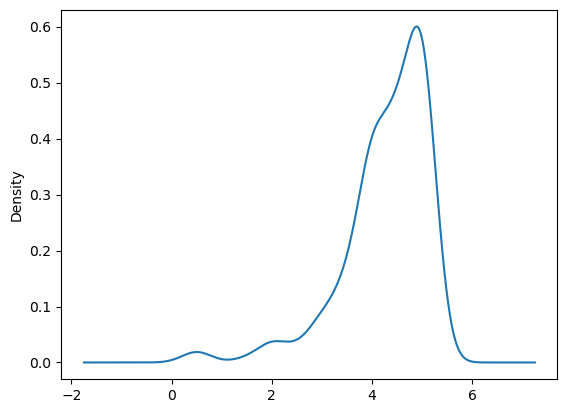

In [394]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

a = pd.merge(movies,ratings,on='movieId')
a[a['title'] == "Fight Club (1999)"]['rating'].plot(kind = 'kde')

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [222]:
s1 = ratings.groupby(['movieId'])[['rating']].count()
s1.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [225]:
rat = ratings.groupby(['movieId'])[['rating']].mean()['rating']
rat
s1['avg_rating'] = rat
s1
s1.rename({'rating' : 'rating_count'},inplace=True)

In [226]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [229]:
s2 = movies.join(s1,on = 'movieId',lsuffix='_movies',rsuffix='_s1',how = 'inner')

In [230]:
s2

,movieId,title,genres,rating,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9739,193585,Flint (2017),Drama,1,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [231]:
more_50_rating = s2[s2['rating']>50]

In [232]:
temp = more_50_rating.join(ratings,on = 'movieId',lsuffix='more_50_rating',rsuffix='_ratings',how = 'inner')

In [233]:
temp = temp.groupby('title')[['rating_ratings']].mean()

In [234]:
temp.reset_index(inplace = True)

In [235]:
temp.sort_values('rating_ratings',ascending=False)

,title,rating_ratings
402,"Truth About Cats & Dogs, The (1996)",5.0
189,Harry Potter and the Order of the Phoenix (2007),5.0
309,Psycho (1960),5.0
310,Pulp Fiction (1994),5.0
183,Grumpier Old Men (1995),5.0
...,...,...
248,Léon: The Professional (a.k.a. The Professiona...,0.5
280,Natural Born Killers (1994),0.5
44,Batman Begins (2005),0.5
312,Raiders of the Lost Ark (Indiana Jones and the...,0.5


In [236]:
temp[(temp['title'] == 'Godfather, The (1972)') |
(temp['title'] == 'Shawshank Redemption, The (1994)') |
(temp['title'] == 'Jumanji (1995)') |
(temp['title'] == 'Wolf of Wall Street, The (2013)')]

,title,rating_ratings
169,"Godfather, The (1972)",3.0
219,Jumanji (1995),4.0
339,"Shawshank Redemption, The (1994)",5.0


In [242]:
# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

temp = more_50_rating.join(ratings,on = 'movieId',lsuffix='_more_50_rating',rsuffix='_ratings',how = 'inner')
# temp.groupby('title')[['rating_more_50_rating']].mean().sort_values('rating_ratings').tail()
temp

,movieId,movieId_more_50_rating,title,genres,rating_more_50_rating,avg_rating,userId,movieId_ratings,rating_ratings,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,1,3,4.0,964981247
1,2,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,1,6,4.0,964982224
2,3,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,1,47,5.0,964983815
5,6,6,Heat (1995),Action|Crime|Thriller,102,3.946078,1,101,5.0,964980868
6,7,7,Sabrina (1995),Comedy|Romance,54,3.185185,1,110,4.0,964982176
...,...,...,...,...,...,...,...,...,...,...
7466,81845,81845,"King's Speech, The (2010)",Drama,58,4.043103,517,56174,3.0,1487953180
7693,89745,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,580,51662,5.0,1212342492
7767,91500,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,594,28,4.5,1108973143
7768,91529,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,76,3.993421,594,367,4.0,1109036766


In [245]:
temp.sort_values('rating_more_50_rating',ascending=False).head()

,movieId,movieId_more_50_rating,title,genres,rating_more_50_rating,avg_rating,userId,movieId_ratings,rating_ratings,timestamp
314,356,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134,4,919,5.0,945079521
277,318,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,4,260,5.0,945079259
257,296,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068,3,7991,5.0,1306463684
510,593,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290,6,62,4.0,845553660
1939,2571,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,19,1625,4.0,965710871


In [249]:
temp[temp['genres'].str.contains('Sci-Fi')].sort_values('rating_more_50_rating',ascending=False)

,movieId,movieId_more_50_rating,title,genres,rating_more_50_rating,avg_rating,userId,movieId_ratings,rating_ratings,timestamp
1939,2571,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,19,1625,4.0,965710871
224,260,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,2,131724,5.0,1445714851
418,480,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000,4,3591,1.0,986935199
507,589,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982,6,50,1.0,845553381
898,1196,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,10,63113,3.5,1455302183
...,...,...,...,...,...,...,...,...,...,...
7767,91500,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,594,28,4.5,1108973143
2029,2701,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547,19,2243,2.0,965706114
559,673,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,6,261,4.0,845553695
144,172,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,1,2640,4.0,964982377


🟢 IMPORTANT NOTE 2 🟢


You already have a subset of data containing only those movies which has recieved more than 50 user ratings

.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required detai

ls.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

# WebScraping

In [395]:
# We thought of giving you a gift this new year by sharing the web scraping script
# Understanding the script before using is always appreciated
# We left few blanks in the script for your exploration
# Make sure to replace FILL_IN_THE_BLANK in the code to make it work
import requests       
import numpy as np
from bs4 import BeautifulSoup


temp = more_50_rating.join(links,on = 'movieId',lsuffix='_L',rsuffix='_R',how = 'inner')

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('div', attrs={'class':'ipc-list-card--border-speech ipc-list-card sc-ec6ac3bc-1 lmojnD ipc-list-card--base'})
    return imdb_rating.text if imdb_rating else np.nan

lst=[]
for i in temp['imdbId']:
    lst.append(scrapper(i))

In [346]:
# Mention the movieId of the movie which has the highest IMDB rating.

temp.sort_values('avg_rating',ascending=False)

,movieId,movieId_L,title,genres,rating,avg_rating,movieId_R,imdbId,tmdbId
277,318,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,360,110093,10879.0
659,858,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,1129,82340,1103.0
2226,2959,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,3967,249462,71.0
975,1276,1276,Cool Hand Luke (1967),Drama,57,4.271930,1693,118607,11831.0
602,750,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041,984,117357,85328.0
...,...,...,...,...,...,...,...,...,...
144,172,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,204,114781,3512.0
145,173,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,205,114798,52856.0
376,432,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455,495,74102,5879.0
379,435,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,499,107613,31911.0


In [353]:
# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

a = temp[temp['genres'].str.contains('Sci-Fi')]

a.sort_values('avg_rating',ascending=False)

,movieId,movieId_L,title,genres,rating,avg_rating,movieId_R,imdbId,tmdbId
224,260,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,300,110932,11450.0
898,1196,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,1593,119896,9413.0
1939,2571,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,3439,103060,1497.0
901,1199,1199,Brazil (1985),Fantasy|Sci-Fi,59,4.177966,1597,118883,8834.0
4909,7361,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131,4.160305,78703,1179794,39545.0
...,...,...,...,...,...,...,...,...,...
559,673,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,888,113596,19004.0
144,172,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,204,114781,3512.0
145,173,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,205,114798,52856.0
379,435,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,499,107613,31911.0


,movieId,movieId_L,title,genres,rating,avg_rating,movieId_R,imdbId,tmdbId
224,260,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,300,110932,11450.0
898,1196,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,1593,119896,9413.0
1939,2571,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,3439,103060,1497.0
901,1199,1199,Brazil (1985),Fantasy|Sci-Fi,59,4.177966,1597,118883,8834.0
4909,7361,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131,4.160305,78703,1179794,39545.0
...,...,...,...,...,...,...,...,...,...
559,673,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,888,113596,19004.0
144,172,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,204,114781,3512.0
145,173,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,205,114798,52856.0
379,435,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,499,107613,31911.0
